***

<center>
<br><span style="color: darkgray; font-size: 40pt">A life-cycle model of risk-taking</span></br> 
<span style="color: darkgray; font-size: 40pt">on the job</span>
<br> </br>
<font color='gray'>by Martin Kerndler, Alexia Prskawetz, Miguel Sánchez-Romero</font>
</center>

***

**Summary** 

*Individuals become more risk-averse with age, yet fatal work injuries rise with age. In this code we develop a life-cycle model that explains this pattern by showing that the declining value of life late in careers increases risk-taking. The model links wages, wealth, and mortality, and shows how pension reforms affect on-the-job mortality and risk behavior.*

# Main computations

In [ ]:
for casescenario in range(11,16)     # All potential model scenarios
#for casescenario in range(1,16)     # All potential model scenarios or modify the range (see 01_dictionaries.jl)

    global CaseScenario = casescenario
    global Model        = "General";
    SampleSize          = 500;

    include("../src/00_main.jl");
    
    # ------------------------------------- Equilibrium -----------------------------------------
    R0                  = 1.0143    # initial value of the interest rate
    tau0                = 0.189618  # initial value of the contribution rate
    
    CM, YLM, YM, ASM, CSM, 
        SM, LM, INCM, VOLM, PopC, 
            ben, wages, zv, τs, Rs = fequilibrium_prices(R0,tau0,CaseScenario,SampleSize,ParU);
    
    # ---------------------------------- Database: Results --------------------------------------    
    plt1, CSur_ojt      = file_plots(YLM,ben,CM,ASM,CSM,SM,VOLM,LM,CaseScenario,SampleSize,ParU)
    
    if (CaseScenario==1 ||CaseScenario==11) && (Model=="General")
        display(plt1)
    end
    
    df0 = DatabaseGenerator(CM,YM,YLM,INCM,CSur_ojt,CSM,SM,ASM,VOLM,LM,
                            τs,ben,CaseScenario,SampleSize,ParU)
    
    if CaseScenario==1 && (Model=="General")        
        df1=filter(:Employment => n->n==1.0,df0)            
        show(describe(df1),allrows=true,allcols=true)
    end

    ParM = mutable_struct(CaseScenario,SampleSize,ParU);
    
    CSV.write("../results/Results_Sigma"*string(ParM.σC)*"_Lambda"*string(ParU.λ)*"_"*Scenarios_Dict[CaseScenario]*".csv",df0)

    ##################################### Value of Life ###########################################
    VSL=sum(SM.*PopC.*VOLM.*(LM.==1.0),dims=1)./sum(SM.*PopC.*(LM.==1.0),dims=1)
    display(mean(VSL))
    pltVSL=boxplot(VSL'./1_000_000,
    #    ylim=(11.0,13.0),
        ylabel="Million US dollars")
    
    if (CaseScenario==1 ||CaseScenario==11) && (Model=="General")        
        display(pltVSL)
    end
    #=
    savefig(pltVSL,"20221115_VSL_Sigma"*string(σCs)*"_Lambda"*string(λs)*"_"*Scenario[CaseScenario]*".png")
    =#
    
    ################################# Unemployment rate ###########################################
    Hs    = sum(sum(  (YM.*SM) .* (PopC./SampleSize),dims=2)) # Labor stock
    Ks    = sum(sum( (ASM.*SM) .* (PopC./SampleSize),dims=2)) # Capital stock
    
    display(["Unemployment rate:" sum((LM.==0.0).*SM.*(PopC./SampleSize))/sum((LM.<2.0).*SM.*(PopC./SampleSize))])
    display(["Effective labor:" Hs/1_000_000 "Capital:" Ks/1_000_000 "GDP:" fCobbDouglas(Ks,Hs,ParU.αY,ParU.δY)[3]/1_000_000])
    display(["Net Productivity:" fCobbDouglas(Ks,Hs,ParU.αY,ParU.δY)[3]/sum(sum((LM.==1.0).*SM.*(PopC./SampleSize),dims=2))])

end

In [2]:

global CaseScenario = 11
global Model        = "General";
SampleSize          = 500;

include("../src/00_main.jl");


11

"Number of processors: 4"

# Main Results

In [49]:
include("../src/08a_results_dataframe.jl");

In [5]:
include("../src/08b_results_tables_and_figures.jl");

## Figure 4

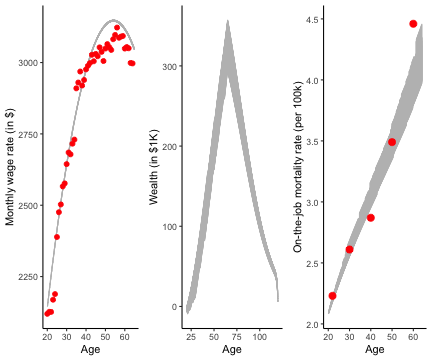

RObject{VecSxp}
TableGrob (1 x 3) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (1-1,3-3) arrange gtable[layout]


In [48]:
f_results_figure4(dfT)

## Figure 5

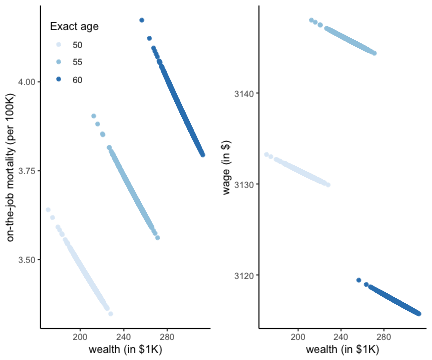

RObject{VecSxp}
TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]


In [9]:
f_results_figure5(dfT)

## Figure 6

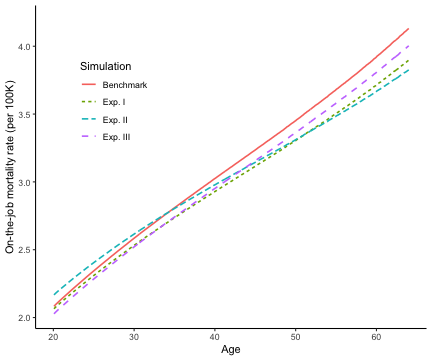

RObject{VecSxp}


In [11]:
f_results_figure6(dfT)

## Figure 7

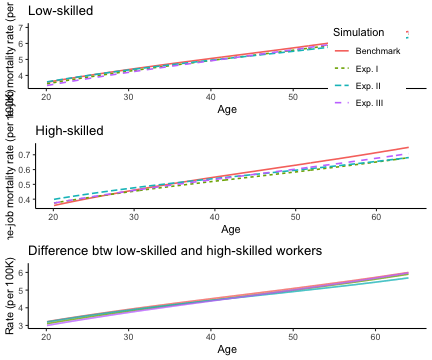

RObject{VecSxp}
TableGrob (3 x 1) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]
3 3 (3-3,1-1) arrange gtable[layout]


In [13]:
f_results_figure7(dfT)

## Figure A4

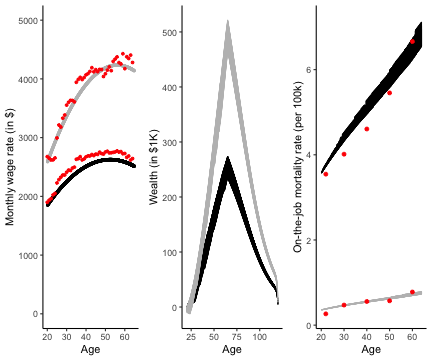

RObject{VecSxp}
TableGrob (1 x 3) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (1-1,3-3) arrange gtable[layout]


In [15]:
f_results_figureA4(dfT)

## Table 2

In [17]:
f_results_table2(dfT)

┌ Warning: RCall.jl: 
│ Please cite as: 
│ 
│  Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.
│  R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 
│ 
└ @ RCall ~/.julia/packages/RCall/WTNSB/src/io.jl:171
┌ Warning: RCall.jl: 
│ Attaching package: ‘kableExtra’
│ 
│ The following object is masked from ‘package:dplyr’:
│ 
│     group_rows
│ 
└ @ RCall ~/.julia/packages/RCall/WTNSB/src/io.jl:171


RObject{StrSxp}


Table: Value of a statistical life overall and by age

Variable           All      Age=40      Age=50      Age=60
-----------  ---------  ----------  ----------  ----------
Estimate      4.22e-02   5.120e-02   4.410e-02   3.810e-02
Std. Error    4.41e-05   2.050e-05   2.270e-05   2.170e-05
w             2.89e+03   2.973e+03   3.131e+03   3.117e+03
VSL           1.22e+01   1.523e+01   1.380e+01   1.187e+01
VOL           1.17e+01   1.229e+01   1.116e+01   9.600e+00


## Table 3

In [19]:
f_results_table3(dfT)


Results
                                                       Dependent variable:                                    
                    ------------------------------------------------------------------------------------------
                                                        log(MortalityJob)                                     
                                (1)                           (2)                            (3)              
--------------------------------------------------------------------------------------------------------------
log(Assets)                  -0.295***                     -0.382***                      -0.489***           
                              (0.0004)                      (0.0003)                       (0.0003)           
                                                                                                              
Constant                      2.364***                      3.570***                       5.035***    

RObject{StrSxp}
 [1] ""                                                                                                              
 [2] "Results"                                                                                                       
 [3] "=============================================================================================================="
 [4] "                                                       Dependent variable:                                    "
 [5] "                    ------------------------------------------------------------------------------------------"
 [6] "                                                            log(Wages)                                        "
 [7] "                                (1)                           (2)                            (3)              "
 [8] "--------------------------------------------------------------------------------------------------------------"
 [9] "log(Assets)                  -0.00

## Table 4

In [21]:
f_results_table4(dfT,SampleSize,ParU)

RObject{StrSxp}


Table: Table 4: Welfare effects of pension reforms and ageing by exact age. Ref=Benchmark (mean values, in %)

 Age2   Benchmark   Exp1    Exp2    Exp3
-----  ----------  -----  ------  ------
   20           0   7.68   -2.40   33.12
   30           0   8.17   -0.96   37.75
   40           0   8.62    0.48   43.28
   50           0   9.00    1.92   49.69
   60           0   9.22    3.38   56.76


## Table 5

In [23]:
f_results_table5(dfT,SampleSize,ParU)

RObject{StrSxp}


Table: Table 5: Welfare effects of pension reforms and ageing by exact age. Ref=Benchmark (mean values, in %)

 Productivity   Age2   Benchmark    Exp1    Exp2    Exp3
-------------  -----  ----------  ------  ------  ------
     644.1682     20           0    5.62   -3.13   31.59
     644.1682     30           0    5.96   -1.79   36.13
     644.1682     40           0    6.24   -0.46   41.59
     644.1682     50           0    6.40    0.88   47.96
     644.1682     60           0    6.30    2.23   55.05
     805.2103     20           0   11.53   -0.43   36.14
     805.2103     30           0   12.00    0.85   40.73
     805.2103     40           0   12.49    2.14   46.19
     805.2103     50           0   13.01    3.43   52.49
     805.2103     60           0   13.58    4.76   59.42


## Table A3

In [25]:
f_results_tableA3(dfT)

RObject{StrSxp}


Table: Table A3: Descriptive statistics of four alternative simulations (Period: Month)

                 Mean        SD           Mean        SD           Mean       SD           Mean        SD
------  -------------  --------  -------------  --------  -------------  -------  -------------  --------
1.mT     2.842000e+01     27.68   2.855000e+01     27.85   2.842000e+01    27.67   2.440000e+01     23.68
10.r     1.400000e-01        NA   1.500000e-01        NA   1.600000e-01       NA   1.300000e-01        NA
2.m      2.600000e-01      0.05   2.500000e-01      0.04   2.500000e-01     0.04   2.500000e-01      0.05
3.mu     3.110000e+00      0.58   3.000000e+00      0.52   3.030000e+00     0.46   3.030000e+00      0.56
4.w      2.875000e+03    293.00   2.846000e+03    289.00   2.812000e+03   286.00   2.891000e+03    294.00
5.y      4.357000e+03    444.00   4.312000e+03    438.00   4.261000e+03   433.00   4.380000e+03    446.00
6.c      1.843000e+03    296.00   1.990000e+0

## Table A5

In [27]:
f_results_tableA5(dfT)



Table: A5, Value of a statistical life overall and by age — Productivity Level 1

Variable            All      Age=40     Age=50      Age=60
-----------  ----------  ----------  ---------  ----------
Estimate      4.000e-02   5.000e-02   4.00e-02   4.000e-02
Std. Error    5.070e-05   2.330e-05   2.42e-05   2.210e-05
w             2.431e+03   2.509e+03   2.62e+03   2.584e+03
VSL           1.035e+01   1.265e+01   1.15e+01   9.940e+00
VOL           9.730e+00   1.021e+01   9.30e+00   8.020e+00


Table: A5, Value of a statistical life overall and by age — Productivity Level 2

Variable            All      Age=40      Age=50      Age=60
-----------  ----------  ----------  ----------  ----------
Estimate      4.000e-02   5.000e-02   4.000e-02   4.000e-02
Std. Error    8.950e-05   2.610e-05   2.960e-05   4.050e-05
w             3.794e+03   3.903e+03   4.187e+03   4.216e+03
VSL           1.636e+01   2.069e+01   1.881e+01   1.613e+01
VOL           1.590e+01   1.669e+01   1.518e+01   1.307e+01

RObject{NilSxp}
NULL


## Table A6

In [29]:
f_results_tableA6(dfT)


Marginal effect of wealth on on-the-job mortality and wages by skill group: Low-skilled
                                                      Dependent variable:                                   
                    ----------------------------------------------------------------------------------------
                                                       log(MortalityJob)                                    
                                (1)                          (2)                           (3)              
------------------------------------------------------------------------------------------------------------
log(Assets)                  -0.281***                    -0.360***                     -0.454***           
                              (0.0004)                     (0.0004)                      (0.0003)           
                                                                                                            
Constant                      2.640*** 

RObject{StrSxp}
 [1] ""                                                                                                          
 [2] "Marginal effect of wealth on on-the-job mortality and wages by skill group: High-skilled"                  
 [3] "=========================================================================================================="
 [4] "                                                     Dependent variable:                                  "
 [5] "                    --------------------------------------------------------------------------------------"
 [6] "                                                          log(Wages)                                      "
 [7] "                                (1)                          (2)                          (3)             "
 [8] "----------------------------------------------------------------------------------------------------------"
 [9] "log(Assets)                  -0.001***                    -0.001**

## Table A7

In [31]:
f_results_tableA7(dfT)

# A tibble: 80 × 5
   Simu      Productivity Variable     Mean      SD
   <chr>            <dbl> <chr>       <dbl>   <dbl>
 1 Benchmark         644. 1.mT       28.5     27.7 
 2 Benchmark         644. 10.r        0.14    NA   
 3 Benchmark         644. 2.m         0.43     0.07
 4 Benchmark         644. 3.mu        5.17     0.9 
 5 Benchmark         644. 4.w      2420      224   
 6 Benchmark         644. 5.y      3667      339   
 7 Benchmark         644. 6.c      1585      258   
 8 Benchmark         644. 7.a       116       79   
 9 Benchmark         644. 8.vol    9772     1084   
10 Benchmark         644. 9.t         0.197   NA   
# ℹ 70 more rows


Table: Table A7: Descriptive statistics of four alternative simulations with two skill groups (Period: Month): Low-skilled

Simu         Productivity  Variable            Mean        SD
----------  -------------  ---------  -------------  --------
Benchmark        644.1682  1.mT        2.854000e+01     27.68
Benchmark        644.1682  1

RObject{NilSxp}
NULL


***

---

***